# Detect Faces and Blur Faces
### Complete # TODO

# Requirements

In [3]:
import cv2
import numpy as np
import os
import time
import matplotlib.pyplot as plt

# Load Models

In [ ]:
prototxt_path = os.path.join("models", "deploy.prototxt")

model_path = os.path.join("models", "res10_300x300_ssd_iter_140000_fp16.caffemodel")
model = cv2.dnn.readNetFromCaffe(prototxt_path, model_path)


This Python code snippet loads a pre-trained Caffe deep learning model using OpenCV.
It first defines the path to the model's architecture file (`deploy.prototxt`) located in a "models" directory.
Next, it defines the path to the corresponding pre-trained model weights file (`res10_300x300_ssd_iter_140000_fp16.caffemodel`).
The `cv2.dnn.readNetFromCaffe` function is then used to load the network using both specified paths.
The loaded neural network model is stored in the `model` variable for later use.

# Face Detection and Blur Function

In [ ]:
def face_blur(image: np.ndarray):
    image = image.copy()
    h, w = image.shape[:2]

    kernel_width = (w // 7) | 1
    kernel_height = (h // 7) | 1

    blob = cv2.dnn.blobFromImage(image, 1.0, (300, 300), (104.0, 177.0, 123.0))

    model.setInput(blob)

    output = np.squeeze(model.forward())

    for i in range(0, output.shape[0]):
        confidence = output[i, 2]

        if confidence > 0.4:
            box = output[i, 3:7] * np.array([w, h, w, h])
            start_x, start_y, end_x, end_y = box.astype(int)
            start_x = max(0, start_x)
            start_y = max(0, start_y)
            end_x = min(w-1, end_x)
            end_y = min(h-1, end_y)

            face = image[start_y:end_y, start_x:end_x]

            face = cv2.GaussianBlur(face, (kernel_width, kernel_height), 0)

            image[start_y:end_y, start_x:end_x] = face

    return image


This Python function, `face_blur`, detects faces in an image and applies a blur to them.
It first creates a copy of the input image and determines a kernel size for blurring based on image dimensions.
A `blob` is created from the image, fed into a pre-loaded deep learning `model` (likely a face detector), to get detections.
The function iterates through detections, and for those with confidence above 0.4, it extracts the face region.
This extracted face region is then blurred using `cv2.GaussianBlur` and placed back into the image, returning the modified image.

# Result on Image

In [ ]:
image_path = os.path.join("images", "musk.jpg")

image = cv2.imread(image_path)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image_face_blur = face_blur(image)


This Python code snippet loads an image and then applies a face blurring effect to it.
It first defines the path to an image file named "musk.jpg" located in an "images" directory.
The image is then loaded using OpenCV's `cv2.imread` function.
Next, the color space of the loaded image is converted from BGR (OpenCV's default) to RGB.
Finally, it calls the `face_blur` function, passing the original BGR image to detect and blur any faces.

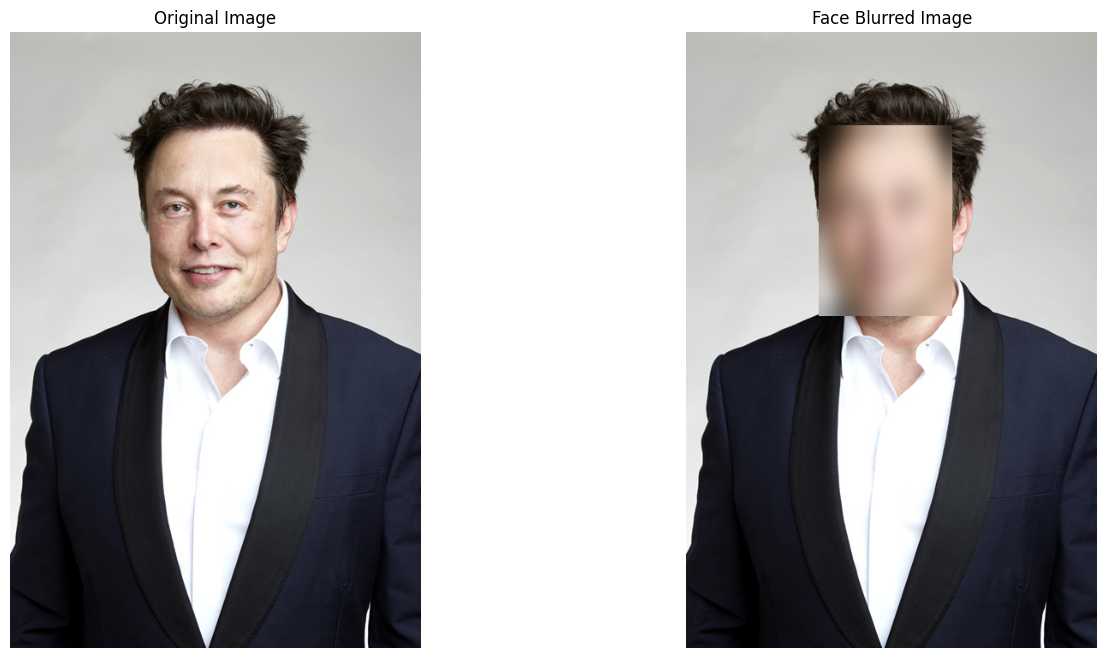

In [ ]:
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image_face_blur, cv2.COLOR_BGR2RGB))
plt.title("Face Blurred Image")
plt.axis("off")
plt.show()


This Python code uses Matplotlib to display two images side-by-side for comparison.
It first creates a figure with a specific size (16x8 inches) to hold the subplots.
The first subplot shows the `image_rgb` (original image), titled "Original Image," with its axes turned off.
The second subplot displays the `image_face_blur` (image with blurred faces), converting it from BGR to RGB for correct Matplotlib display, titled "Face Blurred Image," also with axes off.
Finally, `plt.show()` renders the figure with both images.

# Result on WebCam Video Stream

In [ ]:
def visualize_fps(image, fps: int):
    if len(np.shape(image)) < 3:
        text_color = (255, 255, 255)  
    else:
        text_color = (0, 255, 0)  

    row_size = 20 
    left_margin = 24 
    font_size = 1
    font_thickness = 2
    fps_text = "FPS = {:.1f}".format(fps)
    text_location = (left_margin, row_size)
    cv2.putText(
        image,
        fps_text,
        text_location,
        cv2.FONT_HERSHEY_PLAIN,
        font_size,
        text_color,
        font_thickness,
    )
    return image


This Python function, `visualize_fps`, draws the frames per second (FPS) value onto an input image.
It chooses white text for grayscale images and green text for color images.
The function formats the given `fps` number into a string like "FPS = XX.X".
It then defines the text's on-screen location, font style, size, and thickness.
Finally, `cv2.putText` adds this FPS text to the image, which is then returned.


In [ ]:
CAMERA_DEVICE_ID = 0 
IMAGE_WIDTH = 800
IMAGE_HEIGHT = 600
fps = 0

if __name__ == "__main__":
    try:
        cap = cv2.VideoCapture(CAMERA_DEVICE_ID)
        cap.set(cv2.CAP_PROP_FRAME_WIDTH, IMAGE_WIDTH)
        cap.set(cv2.CAP_PROP_FRAME_HEIGHT, IMAGE_HEIGHT)

        while True:
            start_time = time.time() 
            ret, frame = cap.read() 
            if not ret:
                print("Failed to grab frame from camera.")
                break
            frame = cv2.resize(frame, (IMAGE_WIDTH, IMAGE_HEIGHT)) 
            frame = face_blur(frame) 
            cv2.imshow("frame", visualize_fps(frame, fps))
            end_time = time.time() 
            seconds = end_time - start_time
            fps = 1.0 / seconds if seconds > 0 else 0
            if cv2.waitKey(33) == 27:  
                break
    except Exception as e:
        print(e)
    finally:
        cv2.destroyAllWindows()
        cap.release()


2025-06-02 02:44:44.423 python[15897:4087006] +[IMKClient subclass]: chose IMKClient_Legacy
2025-06-02 02:44:44.425 python[15897:4087006] +[IMKInputSession subclass]: chose IMKInputSession_Legacy


KeyboardInterrupt: 

This Python script performs real-time face blurring on a live camera feed using OpenCV.
It initializes the camera, setting its frame width and height.
In a continuous loop, it captures frames, resizes them, and then applies the `face_blur` function.
The processed frame, now with blurred faces, is displayed with an FPS counter updated by the `visualize_fps` function.
Pressing the 'ESC' key terminates the loop, releasing the camera and closing all OpenCV windows.

In [ ]:
CAMERA_DEVICE_ID = os.path.join("videos", "Jobs_2.mp4")
IMAGE_WIDTH = 1000
IMAGE_HEIGHT = 600
fps = 0
FRAME_RATE = 30
DURATION = 1 / FRAME_RATE

if __name__ == "__main__":
    try:
        cap = cv2.VideoCapture(CAMERA_DEVICE_ID)
        cap.set(cv2.CAP_PROP_FRAME_WIDTH, IMAGE_WIDTH)
        cap.set(cv2.CAP_PROP_FRAME_HEIGHT, IMAGE_HEIGHT)

        while True:
            start_time = time.time()
            ret, frame = cap.read()
            if not ret:
                print("End of video or failed to grab frame.")
                break
            frame = cv2.resize(frame, (IMAGE_WIDTH, IMAGE_HEIGHT))
            frame = face_blur(frame)
            end_time = time.time()
            seconds = end_time - start_time
            if seconds < DURATION:
                time.sleep(DURATION - seconds)
            seconds = time.time() - start_time
            fps = 1.0 / seconds if seconds > 0 else 0
            cv2.imshow("frame", visualize_fps(frame, fps))
            if cv2.waitKey(33) == 27:
                break
    except Exception as e:
        print(e)
    finally:
        cv2.destroyAllWindows()
        cap.release()

End of video or failed to grab frame.


OpenCV: Couldn't read video stream from file "videos/Jobs_2.mp4"


: 

This Python script processes a video file, applying a face blurring effect to its frames.
It initializes video capture from a specified file path and sets a target frame rate for playback.
In a loop, it reads each frame, resizes it, and then applies the `face_blur` function.
The script attempts to maintain the target frame rate by pausing if processing is too fast, then displays the frame with an FPS counter.
Playback stops if the 'ESC' key is pressed or the video ends, followed by cleanup.